In [22]:
import numpy as np
import pandas as pd
import sys
import csv
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, CategoricalNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.preprocessing import StandardScaler, MinMaxScaler # For feature scaling
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Data Generation

In [36]:
# read each of the csv files as a *pandas data frame*
dataset = pd.read_csv("cleaned_data_combined_TRIMMED.csv",
                      keep_default_na=False         # Prevent pandas from auto-converting "None"-like strings
                      )
def generate_fet1_food_complexity():
    return dataset["Q1: From a scale 1 to 5, how complex is it to make this food? (Where 1 is the most simple, and 5 is the most complex)"]

def generate_fet2_number_of_ingredients():
    return dataset["Q2: How many ingredients would you expect this food item to contain?"]

def generate_fet3_occasion_versatility():
    retlst = []
    for occasions in dataset["Q3: In what setting would you expect this food to be served? Please check all that apply"]:
        retlst.append(len(occasions.split(",")))
    return retlst

def generate_fet4_price_per_serving():
    return dataset["Q4: How much would you expect to pay for one serving of this food item?"]

def generate_fet5_reminiscent_movie():
    retlst= []
    movie_map = {"Home Alone": 1, "Teenage Mutant Ninja Turtles": 1, "spiderman": 1, "Spider-Man 2": 1, "Spiderman": 1,
                 "Cloudy with a Chance of Meatballs": 1, "Cloudy with a chance of meatballs": 1, "The Godfather": 1,
                 "Home alone": 1, "Ratatoullie": 1,
                 "The Avengers": 2, "Avengers": 2, "avengers": 2, "The Avengers (2012)": 2, "none": 2, "Aladdin": 2,
                 "The Dictator": 2, "Borat": 2, "Dangal": 2,
                 "Jiro Dreams of Sushi": 3, "Finding Nemo": 3, "Spirited Away": 3, "Kill Bill": 3, "Your Name": 3,
                 "Kung Fu Panda": 3, "Monsters Inc.": 3, "Godzilla": 3, "The Wolverine": 3, "Big Hero 6": 3
                }
    for movie in dataset["Q5: What movie do you think of when thinking of this food item?"]:
        if movie in movie_map:
            retlst.append(movie_map[movie])
        else:
            retlst.append(0)
    return retlst

def generate_fet6_drink_to_pair_with():
    retlst= []
    drink_map = {"Water": 1, "water": 1, "Iced Tea": 1, "Nestea": 1, "Juice": 1,
                 "Coke": 2, "coke": 2, "Soda": 2, "soda": 2, "Coca Cola": 2, "Coca-Cola": 2,
                 "Sprite": 2, "Diet Coke": 2, "Pepsi": 2,
                 "Tea": 3, "Sake": 3, "tea": 3, "Green tea": 3, "Green Tea": 3, "sake": 3, "green tea": 3
                }
    for drink in dataset["Q6: What drink would you pair with this food item?"]:
        if drink in drink_map:
            retlst.append(drink_map[drink])
        else:
            retlst.append(0)
    return retlst

def generate_fet7_reminiscent_persons_versatility():
    retlst = []
    for persons in dataset["Q7: When you think about this food item, who does it remind you of?"]:
        retlst.append(len(persons.split(",")))
    return retlst

def generate_fet8_hot_sauce_level():
    retlst = []
    hot_sauce_level_map = {"None": 0,
                           "A little (mild)": 1,
                           "A moderate amount (medium)": 2,
                           "A lot (hot)": 3,
                           "I will have some of this food item with my hot sauce": 4
                          }
    for hot_sauce_level in dataset["Q8: How much hot sauce would you add to this food item?"]:
        retlst.append(hot_sauce_level_map[hot_sauce_level])
    return retlst

def generate_feature_matrix():
    feature_matrix = np.stack([
        generate_fet1_food_complexity(),
        generate_fet2_number_of_ingredients(),
        generate_fet3_occasion_versatility(),
        generate_fet4_price_per_serving(),
        generate_fet5_reminiscent_movie(),
        generate_fet6_drink_to_pair_with(),
        generate_fet7_reminiscent_persons_versatility(),
        generate_fet8_hot_sauce_level()
        ], axis=1)
    return feature_matrix

def generate_one_hot_labels():
    one_hot_matrix = np.zeros((1539, 3))
    food_labels = np.array(dataset["Label"])
    for label in range(len(food_labels)):
        if food_labels[label] == "Pizza":
            one_hot_matrix[label][0] = 1
        elif food_labels[label] == "Shawarma":
            one_hot_matrix[label][1] = 1
        elif food_labels[label] == "Sushi":
            one_hot_matrix[label][2] = 1
    return one_hot_matrix

data_fets   = generate_feature_matrix()  # USE THIS!
data_truths = generate_one_hot_labels()  # USE THIS!


In [38]:

# Normalize Feature 2 and 4
feature2 = data_fets[:,1]
feature4 = data_fets[:,3]
scaler = MinMaxScaler()
feature2 = scaler.fit_transform(feature2.reshape(-1,1).reshape(-1, 1)).flatten()
data_fets[:,1] = feature2
feature4 = scaler.fit_transform(feature4.reshape(-1,1).reshape(-1, 1)).flatten()
data_fets[:,3] = feature4
print(data_fets)


# Split 80% training, 20% testing, with a fixed random seed
X_train, X_test, y_train, y_test = train_test_split(
    data_fets, data_truths, 
    test_size=0.1,  # 20% for testing
    random_state=42,  # Reproducible results
    stratify=data_truths # Distributes classes evenly
)
y_not_one_hot_train = np.argmax(y_train, axis=1) 
y_not_one_hot_test = np.argmax(y_test, axis=1) 

[[3.         0.20833333 3.         ... 0.         1.         1.        ]
 [4.         0.04166667 3.         ... 2.         3.         0.        ]
 [3.         0.16666667 4.         ... 0.         1.         2.        ]
 ...
 [2.         0.16666667 3.         ... 0.         1.         0.        ]
 [1.         0.08333333 3.         ... 0.         3.         1.        ]
 [4.         0.125      5.         ... 0.         4.         0.        ]]


# Naive Bayes

Train Accuracy: 0.7986
Test Accuracy: 0.7727
              precision    recall  f1-score   support

       Pizza       0.77      0.79      0.78        52
    Shawarma       0.74      0.78      0.76        51
       Sushi       0.81      0.75      0.78        51

    accuracy                           0.77       154
   macro avg       0.77      0.77      0.77       154
weighted avg       0.77      0.77      0.77       154



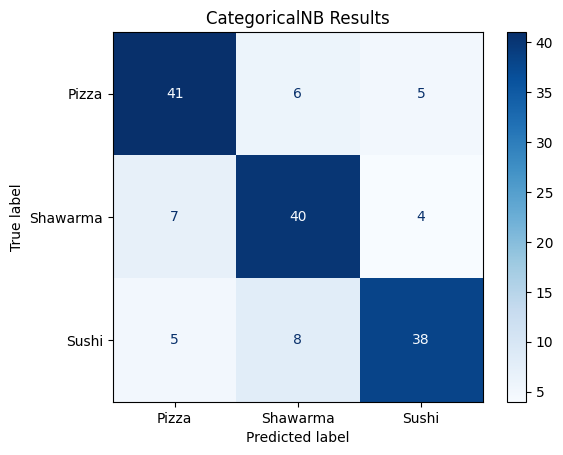

In [39]:

nb_classifier = CategoricalNB()
# Train the model
nb_classifier.fit(X_train, y_not_one_hot_train)

#Predict on the training set
y_train_pred = nb_classifier.predict(X_train)
accuracy_train = accuracy_score(y_not_one_hot_train, y_train_pred)

# Predict on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_not_one_hot_test, y_pred)
report = classification_report(y_not_one_hot_test, y_pred, target_names=["Pizza", "Shawarma", "Sushi"])

print(f'Train Accuracy: {accuracy_train:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')
print(report)
# Confusion Matrix
cm = confusion_matrix(y_not_one_hot_test, y_pred, labels=nb_classifier.classes_ )
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=["Pizza", "Shawarma", "Sushi"]  # Use class labels from the model
)
disp.plot(cmap=plt.cm.Blues)  # Customize colormap
plt.title("CategoricalNB Results")
plt.show()


# Logistic Regression

Train Accuracy: 0.7986
Accuracy: 0.6948
              precision    recall  f1-score   support

       Pizza       0.65      0.71      0.68        52
    Shawarma       0.70      0.75      0.72        51
       Sushi       0.74      0.63      0.68        51

    accuracy                           0.69       154
   macro avg       0.70      0.69      0.69       154
weighted avg       0.70      0.69      0.69       154



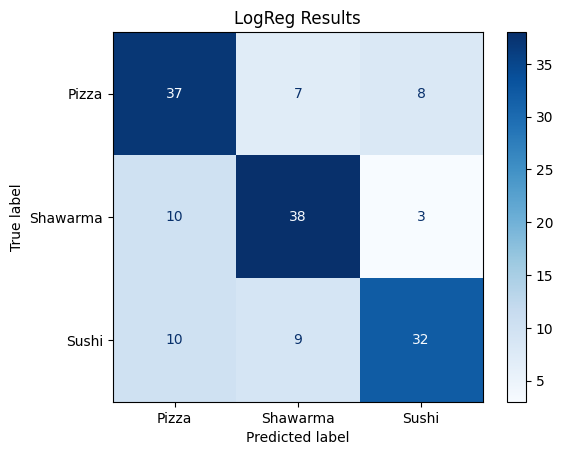

In [40]:
logreg = LogisticRegression(solver='lbfgs', max_iter=1000)
# Train the model
logreg.fit(X_train, y_not_one_hot_train)

#Predict on the training set
y_train_pred = nb_classifier.predict(X_train)
accuracy_train = accuracy_score(y_not_one_hot_train, y_train_pred)

# Predict on the test set
y_pred = logreg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_not_one_hot_test, y_pred)
report = classification_report(y_not_one_hot_test, y_pred, target_names=["Pizza", "Shawarma", "Sushi"])

print(f'Train Accuracy: {accuracy_train:.4f}')
print(f'Accuracy: {accuracy:.4f}')
print(report)
# Confusion Matrix
cm = confusion_matrix(y_not_one_hot_test, y_pred, labels=logreg.classes_ )
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=["Pizza", "Shawarma", "Sushi"]  # Use class labels from the model
)
disp.plot(cmap=plt.cm.Blues)  # Customize colormap
plt.title("LogReg Results")
plt.show()

# KNN

Accuracy: 0.8074735987002437
Accuracy: 0.711038961038961
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.75      0.70        93
           1       0.71      0.70      0.70       117
           2       0.79      0.68      0.73        98

    accuracy                           0.71       308
   macro avg       0.72      0.71      0.71       308
weighted avg       0.72      0.71      0.71       308



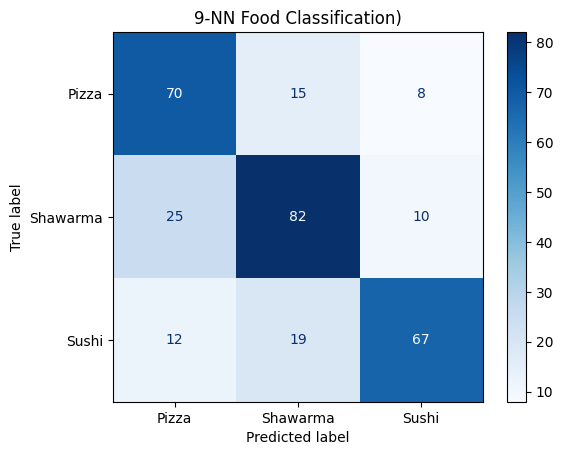

In [41]:
# Normalize the data
scaler = StandardScaler()
data_fets = scaler.fit_transform(data_fets)

# Split 80% training, 20% testing, with a fixed random seed
X_train, X_test, y_train, y_test = train_test_split(
    data_fets, data_truths, 
    test_size=0.2,  # 20% for testing
    random_state=42  # Reproducible results
)
y_train = np.argmax(y_train, axis=1) 
y_test = np.argmax(y_test, axis=1) 

# Train with different K values
acc = []
for i in range(1, 100):
    # Train KNN
    knn = KNN(n_neighbors=i, metric='euclidean')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc.append(accuracy_score(y_test, y_pred))

# Evaluate with best K value
best_k = acc.index(max(acc)) + 1
knn = KNN(n_neighbors=best_k, metric='euclidean')
knn.fit(X_train, y_train)

y_pred_train = knn.predict(X_train)
y_pred = knn.predict(X_test)

print("Accuracy:", accuracy_score(y_train, y_pred_train))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=["Pizza", "Shawarma", "Sushi"])
disp.plot(cmap=plt.cm.Blues)
plt.title(str(best_k) + "-NN Food Classification)")
plt.show()